In [21]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import time
import warnings
warnings.filterwarnings("ignore")

In [23]:
url = "https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

In [24]:
response = requests.get(url)
response.status_code

200

In [25]:
request_header = {'Content-Type': 'image/webp; charset=UTF-8', 
                  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:126.0) Gecko/20100101 Firefox/126.0',
                'Accept-Encoding': 'gzip, deflate, br, zstd'                  
                 }

response = requests.get(url, headers=request_header)

In [26]:
response

<Response [200]>

In [27]:
soup = BeautifulSoup(response.content, "html.parser")

In [28]:
soup

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.066267.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><l

In [29]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'
}

all_mobiles = []


for page in range(1, 26):
    print(f"Scraping page {page}...")
    url = f"https://www.flipkart.com/search?q=mobiles&page={page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')

    products = soup.find_all("div", {"class": "tUxRFH"})

    for product in products:
        name = product.find("div", {"class": "KzDlHZ"})
        price = product.find("div", {"class": "Nx9bqj _4b5DiR"})
        rating = product.find("div", {"class": "XQDdHH"})
        features = product.find_all("li", {"class": "J+igdf"})

   
        ram_rom = camera = display = battery = warranty = reviews = "Not Available"

        
        if features:
            if len(features) > 0:
                ram_rom = features[0].text.strip()
            if len(features) > 1:
                camera = features[1].text.strip()
            if len(features) > 2:
                display = features[2].text.strip()
            if len(features) > 3:
                battery = features[3].text.strip()
            if len(features) > 4:
                reviews = features[4].text.strip()
            if len(features) > 5:
                warranty = features[5].text.strip()

       
        if name and price:
            all_mobiles.append({
                "Product Name": name.text.strip(),
                "Price": price.text.strip(),
                "Rating": rating.text.strip() if rating else "No Rating",
                "RAM/ROM": ram_rom,
                "Camera": camera,
                "Display": display,
                "Battery": battery,
                
                "Warranty": warranty
            })

    time.sleep(2)  
print("Scraping Completed")

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping Completed


In [30]:
df = pd.DataFrame(all_mobiles)
# Save to CSV
df.to_csv("flipkart_mobiles_full_specs.csv", index=False, encoding='utf-8-sig')

print(f"\n Total Mobiles Scraped: {len(df)}")
print("Data saved to flipkart_mobiles_full_specs.csv successfully!")


 Total Mobiles Scraped: 600
Data saved to flipkart_mobiles_full_specs.csv successfully!


In [31]:
df

,Product Name,Price,Rating,RAM/ROM,Camera,Display,Battery,Warranty
0,"POCO C71 (Cool Blue, 128 GB)","₹6,799",4.1,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
1,"POCO C71 (Desert Gold, 64 GB)","₹6,199",3.8,4 GB RAM | 64 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
2,"vivo T4x 5G (Glacial Teal, 128 GB)","₹14,499",4.4,6 GB RAM | 128 GB ROM,17.07 cm (6.72 inch) Display,50MP + 2MP | 8MP Front Camera,6500 mAh Battery,1 Year Warranty for Device and 6 Months Warran...
3,"POCO C75 5G (Enchanted Green, 64 GB)","₹7,799",4.2,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.48 cm (6.88 inch) HD+ Display,50MP Rear Camera | 5MP Front Camera,5160 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
4,"POCO C71 (Power Black, 128 GB)","₹6,799",4.1,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
...,...,...,...,...,...,...,...,...
595,"Tecno Spark Go 5G (Turquoise Green, 128 GB)","₹10,999",4.3,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,17.12 cm (6.74 inch) Display,50MP Rear Camera | 5MP Front Camera,6000 mAh Battery,1 Year Manufacturer Warranty for Handset
596,"MOTOROLA Edge 60 Pro (Pantone Dazzling Blue, 5...","₹37,999",4.3,16 GB RAM | 512 GB ROM,17.02 cm (6.7 inch) Display,50MP + 50MP + 10MP | 50MP Front Camera,6000 mAh Battery,1 Year Warranty on Handset and 6 Months Warran...
597,"REDMI 15 5G (Midnight Black, 128 GB)","₹15,449",4.2,8 GB RAM | 128 GB ROM,17.53 cm (6.9 inch) Display,50MP Rear Camera,7000 mAh Battery,Not Available
598,"Ai+ Pulse (Purple, 64 GB)","₹5,999",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.13 cm (6.745 inch) HD+ Display,50MP Rear Camera | 5MP Front Camera,5000 mAh Battery,1 Year Warranty on Handset and 6 Months Warran...


In [32]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
print("Duplicates removed successfully!")

Duplicates removed successfully!


In [33]:
df

,Product Name,Price,Rating,RAM/ROM,Camera,Display,Battery,Warranty
0,"POCO C71 (Cool Blue, 128 GB)","₹6,799",4.1,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
1,"POCO C71 (Desert Gold, 64 GB)","₹6,199",3.8,4 GB RAM | 64 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
2,"vivo T4x 5G (Glacial Teal, 128 GB)","₹14,499",4.4,6 GB RAM | 128 GB ROM,17.07 cm (6.72 inch) Display,50MP + 2MP | 8MP Front Camera,6500 mAh Battery,1 Year Warranty for Device and 6 Months Warran...
3,"POCO C75 5G (Enchanted Green, 64 GB)","₹7,799",4.2,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.48 cm (6.88 inch) HD+ Display,50MP Rear Camera | 5MP Front Camera,5160 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
4,"POCO C71 (Power Black, 128 GB)","₹6,799",4.1,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
...,...,...,...,...,...,...,...,...
595,"Tecno Spark Go 5G (Turquoise Green, 128 GB)","₹10,999",4.3,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,17.12 cm (6.74 inch) Display,50MP Rear Camera | 5MP Front Camera,6000 mAh Battery,1 Year Manufacturer Warranty for Handset
596,"MOTOROLA Edge 60 Pro (Pantone Dazzling Blue, 5...","₹37,999",4.3,16 GB RAM | 512 GB ROM,17.02 cm (6.7 inch) Display,50MP + 50MP + 10MP | 50MP Front Camera,6000 mAh Battery,1 Year Warranty on Handset and 6 Months Warran...
597,"REDMI 15 5G (Midnight Black, 128 GB)","₹15,449",4.2,8 GB RAM | 128 GB ROM,17.53 cm (6.9 inch) Display,50MP Rear Camera,7000 mAh Battery,Not Available
598,"Ai+ Pulse (Purple, 64 GB)","₹5,999",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.13 cm (6.745 inch) HD+ Display,50MP Rear Camera | 5MP Front Camera,5000 mAh Battery,1 Year Warranty on Handset and 6 Months Warran...


In [34]:
# Replace blank strings or 'NA' with actual NaN
df.replace(["", " ", "NA", "na", "n/a", "N/A", "None"], pd.NA, inplace=True)

# Fill missing values with 'Not Available'
df.fillna("Not Available", inplace=True)

print("Missing values handled successfully!")


Missing values handled successfully!


In [35]:
df

,Product Name,Price,Rating,RAM/ROM,Camera,Display,Battery,Warranty
0,"POCO C71 (Cool Blue, 128 GB)","₹6,799",4.1,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
1,"POCO C71 (Desert Gold, 64 GB)","₹6,199",3.8,4 GB RAM | 64 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
2,"vivo T4x 5G (Glacial Teal, 128 GB)","₹14,499",4.4,6 GB RAM | 128 GB ROM,17.07 cm (6.72 inch) Display,50MP + 2MP | 8MP Front Camera,6500 mAh Battery,1 Year Warranty for Device and 6 Months Warran...
3,"POCO C75 5G (Enchanted Green, 64 GB)","₹7,799",4.2,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.48 cm (6.88 inch) HD+ Display,50MP Rear Camera | 5MP Front Camera,5160 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
4,"POCO C71 (Power Black, 128 GB)","₹6,799",4.1,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
...,...,...,...,...,...,...,...,...
595,"Tecno Spark Go 5G (Turquoise Green, 128 GB)","₹10,999",4.3,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,17.12 cm (6.74 inch) Display,50MP Rear Camera | 5MP Front Camera,6000 mAh Battery,1 Year Manufacturer Warranty for Handset
596,"MOTOROLA Edge 60 Pro (Pantone Dazzling Blue, 5...","₹37,999",4.3,16 GB RAM | 512 GB ROM,17.02 cm (6.7 inch) Display,50MP + 50MP + 10MP | 50MP Front Camera,6000 mAh Battery,1 Year Warranty on Handset and 6 Months Warran...
597,"REDMI 15 5G (Midnight Black, 128 GB)","₹15,449",4.2,8 GB RAM | 128 GB ROM,17.53 cm (6.9 inch) Display,50MP Rear Camera,7000 mAh Battery,Not Available
598,"Ai+ Pulse (Purple, 64 GB)","₹5,999",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.13 cm (6.745 inch) HD+ Display,50MP Rear Camera | 5MP Front Camera,5000 mAh Battery,1 Year Warranty on Handset and 6 Months Warran...


In [36]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Remove leading/trailing spaces from text columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip()

print("Extra spaces cleaned successfully!")


Extra spaces cleaned successfully!


In [37]:
df

,Product Name,Price,Rating,RAM/ROM,Camera,Display,Battery,Warranty
0,"POCO C71 (Cool Blue, 128 GB)","₹6,799",4.1,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
1,"POCO C71 (Desert Gold, 64 GB)","₹6,199",3.8,4 GB RAM | 64 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
2,"vivo T4x 5G (Glacial Teal, 128 GB)","₹14,499",4.4,6 GB RAM | 128 GB ROM,17.07 cm (6.72 inch) Display,50MP + 2MP | 8MP Front Camera,6500 mAh Battery,1 Year Warranty for Device and 6 Months Warran...
3,"POCO C75 5G (Enchanted Green, 64 GB)","₹7,799",4.2,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.48 cm (6.88 inch) HD+ Display,50MP Rear Camera | 5MP Front Camera,5160 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
4,"POCO C71 (Power Black, 128 GB)","₹6,799",4.1,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
...,...,...,...,...,...,...,...,...
595,"Tecno Spark Go 5G (Turquoise Green, 128 GB)","₹10,999",4.3,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,17.12 cm (6.74 inch) Display,50MP Rear Camera | 5MP Front Camera,6000 mAh Battery,1 Year Manufacturer Warranty for Handset
596,"MOTOROLA Edge 60 Pro (Pantone Dazzling Blue, 5...","₹37,999",4.3,16 GB RAM | 512 GB ROM,17.02 cm (6.7 inch) Display,50MP + 50MP + 10MP | 50MP Front Camera,6000 mAh Battery,1 Year Warranty on Handset and 6 Months Warran...
597,"REDMI 15 5G (Midnight Black, 128 GB)","₹15,449",4.2,8 GB RAM | 128 GB ROM,17.53 cm (6.9 inch) Display,50MP Rear Camera,7000 mAh Battery,Not Available
598,"Ai+ Pulse (Purple, 64 GB)","₹5,999",4.3,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.13 cm (6.745 inch) HD+ Display,50MP Rear Camera | 5MP Front Camera,5000 mAh Battery,1 Year Warranty on Handset and 6 Months Warran...


In [38]:
# Identify the price column (it may be 'Price' or 'Product Price')
if 'Price' in df.columns:
    price_col = 'Price'
elif 'Product Price' in df.columns:
    price_col = 'Product Price'
else:
    price_col = None

# Clean ₹ symbol and commas, convert to numeric
if price_col:
    df[price_col] = df[price_col].astype(str).str.replace(r'[₹,]', '', regex=True)
    df[price_col] = pd.to_numeric(df[price_col], errors='coerce')
print("Price column cleaned and converted to numeric!")


Price column cleaned and converted to numeric!


In [39]:
df

,Product Name,Price,Rating,RAM/ROM,Camera,Display,Battery,Warranty
0,"POCO C71 (Cool Blue, 128 GB)",6799,4.1,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
1,"POCO C71 (Desert Gold, 64 GB)",6199,3.8,4 GB RAM | 64 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
2,"vivo T4x 5G (Glacial Teal, 128 GB)",14499,4.4,6 GB RAM | 128 GB ROM,17.07 cm (6.72 inch) Display,50MP + 2MP | 8MP Front Camera,6500 mAh Battery,1 Year Warranty for Device and 6 Months Warran...
3,"POCO C75 5G (Enchanted Green, 64 GB)",7799,4.2,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.48 cm (6.88 inch) HD+ Display,50MP Rear Camera | 5MP Front Camera,5160 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
4,"POCO C71 (Power Black, 128 GB)",6799,4.1,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
...,...,...,...,...,...,...,...,...
595,"Tecno Spark Go 5G (Turquoise Green, 128 GB)",10999,4.3,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,17.12 cm (6.74 inch) Display,50MP Rear Camera | 5MP Front Camera,6000 mAh Battery,1 Year Manufacturer Warranty for Handset
596,"MOTOROLA Edge 60 Pro (Pantone Dazzling Blue, 5...",37999,4.3,16 GB RAM | 512 GB ROM,17.02 cm (6.7 inch) Display,50MP + 50MP + 10MP | 50MP Front Camera,6000 mAh Battery,1 Year Warranty on Handset and 6 Months Warran...
597,"REDMI 15 5G (Midnight Black, 128 GB)",15449,4.2,8 GB RAM | 128 GB ROM,17.53 cm (6.9 inch) Display,50MP Rear Camera,7000 mAh Battery,Not Available
598,"Ai+ Pulse (Purple, 64 GB)",5999,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.13 cm (6.745 inch) HD+ Display,50MP Rear Camera | 5MP Front Camera,5000 mAh Battery,1 Year Warranty on Handset and 6 Months Warran...


In [40]:
# Capitalize all product names
df['Product Name'] = df['Product Name'].astype(str).str.title()
print("Product names standardized!")


Product names standardized!


In [41]:
df['Product Name']

0                           Poco C71 (Cool Blue, 128 Gb)
1                          Poco C71 (Desert Gold, 64 Gb)
2                     Vivo T4X 5G (Glacial Teal, 128 Gb)
3                   Poco C75 5G (Enchanted Green, 64 Gb)
4                         Poco C71 (Power Black, 128 Gb)
                             ...                        
595          Tecno Spark Go 5G (Turquoise Green, 128 Gb)
596    Motorola Edge 60 Pro (Pantone Dazzling Blue, 5...
597                 Redmi 15 5G (Midnight Black, 128 Gb)
598                            Ai+ Pulse (Purple, 64 Gb)
599                  Vivo T4 Pro 5G (Blaze Gold, 128 Gb)
Name: Product Name, Length: 498, dtype: object

In [42]:
print("\nData Types After Cleaning:\n")
print(df.dtypes)


Data Types After Cleaning:

Product Name    object
Price            int64
Rating          object
RAM/ROM         object
Camera          object
Display         object
Battery         object
Warranty        object
dtype: object


In [43]:
df = df.loc[:, ~df.columns.str.lower().isin(['colors', 'storage', 'color', 'storage'])]
df

,Product Name,Price,Rating,RAM/ROM,Camera,Display,Battery,Warranty
0,"Poco C71 (Cool Blue, 128 Gb)",6799,4.1,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
1,"Poco C71 (Desert Gold, 64 Gb)",6199,3.8,4 GB RAM | 64 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
2,"Vivo T4X 5G (Glacial Teal, 128 Gb)",14499,4.4,6 GB RAM | 128 GB ROM,17.07 cm (6.72 inch) Display,50MP + 2MP | 8MP Front Camera,6500 mAh Battery,1 Year Warranty for Device and 6 Months Warran...
3,"Poco C75 5G (Enchanted Green, 64 Gb)",7799,4.2,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.48 cm (6.88 inch) HD+ Display,50MP Rear Camera | 5MP Front Camera,5160 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
4,"Poco C71 (Power Black, 128 Gb)",6799,4.1,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...
...,...,...,...,...,...,...,...,...
595,"Tecno Spark Go 5G (Turquoise Green, 128 Gb)",10999,4.3,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,17.12 cm (6.74 inch) Display,50MP Rear Camera | 5MP Front Camera,6000 mAh Battery,1 Year Manufacturer Warranty for Handset
596,"Motorola Edge 60 Pro (Pantone Dazzling Blue, 5...",37999,4.3,16 GB RAM | 512 GB ROM,17.02 cm (6.7 inch) Display,50MP + 50MP + 10MP | 50MP Front Camera,6000 mAh Battery,1 Year Warranty on Handset and 6 Months Warran...
597,"Redmi 15 5G (Midnight Black, 128 Gb)",15449,4.2,8 GB RAM | 128 GB ROM,17.53 cm (6.9 inch) Display,50MP Rear Camera,7000 mAh Battery,Not Available
598,"Ai+ Pulse (Purple, 64 Gb)",5999,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.13 cm (6.745 inch) HD+ Display,50MP Rear Camera | 5MP Front Camera,5000 mAh Battery,1 Year Warranty on Handset and 6 Months Warran...


In [44]:
df.loc[:, 'Color'] = df['Product Name'].apply(
    lambda x: next(iter(re.findall(r"\(([^,]+),", str(x))), "Not Available")
)

df.loc[:, 'Storage'] = df['Product Name'].apply(
    lambda x: next(iter(re.findall(r",\s*([\d]+\s*[A-Za-z]+)\)", str(x))), "Not Available")
)

In [45]:
df

,Product Name,Price,Rating,RAM/ROM,Camera,Display,Battery,Warranty,Color,Storage
0,"Poco C71 (Cool Blue, 128 Gb)",6799,4.1,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...,Cool Blue,128 Gb
1,"Poco C71 (Desert Gold, 64 Gb)",6199,3.8,4 GB RAM | 64 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...,Desert Gold,64 Gb
2,"Vivo T4X 5G (Glacial Teal, 128 Gb)",14499,4.4,6 GB RAM | 128 GB ROM,17.07 cm (6.72 inch) Display,50MP + 2MP | 8MP Front Camera,6500 mAh Battery,1 Year Warranty for Device and 6 Months Warran...,Glacial Teal,128 Gb
3,"Poco C75 5G (Enchanted Green, 64 Gb)",7799,4.2,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.48 cm (6.88 inch) HD+ Display,50MP Rear Camera | 5MP Front Camera,5160 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...,Enchanted Green,64 Gb
4,"Poco C71 (Power Black, 128 Gb)",6799,4.1,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...,Power Black,128 Gb
...,...,...,...,...,...,...,...,...,...,...
595,"Tecno Spark Go 5G (Turquoise Green, 128 Gb)",10999,4.3,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,17.12 cm (6.74 inch) Display,50MP Rear Camera | 5MP Front Camera,6000 mAh Battery,1 Year Manufacturer Warranty for Handset,Turquoise Green,128 Gb
596,"Motorola Edge 60 Pro (Pantone Dazzling Blue, 5...",37999,4.3,16 GB RAM | 512 GB ROM,17.02 cm (6.7 inch) Display,50MP + 50MP + 10MP | 50MP Front Camera,6000 mAh Battery,1 Year Warranty on Handset and 6 Months Warran...,Pantone Dazzling Blue,512 Gb
597,"Redmi 15 5G (Midnight Black, 128 Gb)",15449,4.2,8 GB RAM | 128 GB ROM,17.53 cm (6.9 inch) Display,50MP Rear Camera,7000 mAh Battery,Not Available,Midnight Black,128 Gb
598,"Ai+ Pulse (Purple, 64 Gb)",5999,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.13 cm (6.745 inch) HD+ Display,50MP Rear Camera | 5MP Front Camera,5000 mAh Battery,1 Year Warranty on Handset and 6 Months Warran...,Purple,64 Gb


In [46]:
# Extract RAM 
df['RAM'] = df['RAM/ROM'].apply(
    lambda x: next(iter(re.findall(r"(\d+\s*GB)\s*RAM", str(x))), "Not Available")
)

# Extract ROM (e.g., "128 GB" from "6 GB RAM | 128 GB ROM")
df['ROM'] = df['RAM/ROM'].apply(
    lambda x: next(iter(re.findall(r"(\d+\s*GB)\s*ROM", str(x))), "Not Available")
)


In [47]:
df

,Product Name,Price,Rating,RAM/ROM,Camera,Display,Battery,Warranty,Color,Storage,RAM,ROM
0,"Poco C71 (Cool Blue, 128 Gb)",6799,4.1,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...,Cool Blue,128 Gb,6 GB,128 GB
1,"Poco C71 (Desert Gold, 64 Gb)",6199,3.8,4 GB RAM | 64 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...,Desert Gold,64 Gb,4 GB,64 GB
2,"Vivo T4X 5G (Glacial Teal, 128 Gb)",14499,4.4,6 GB RAM | 128 GB ROM,17.07 cm (6.72 inch) Display,50MP + 2MP | 8MP Front Camera,6500 mAh Battery,1 Year Warranty for Device and 6 Months Warran...,Glacial Teal,128 Gb,6 GB,128 GB
3,"Poco C75 5G (Enchanted Green, 64 Gb)",7799,4.2,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.48 cm (6.88 inch) HD+ Display,50MP Rear Camera | 5MP Front Camera,5160 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...,Enchanted Green,64 Gb,4 GB,64 GB
4,"Poco C71 (Power Black, 128 Gb)",6799,4.1,6 GB RAM | 128 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,1 Year Manufacturer Warranty for Phone and 6 M...,Power Black,128 Gb,6 GB,128 GB
...,...,...,...,...,...,...,...,...,...,...,...,...
595,"Tecno Spark Go 5G (Turquoise Green, 128 Gb)",10999,4.3,4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,17.12 cm (6.74 inch) Display,50MP Rear Camera | 5MP Front Camera,6000 mAh Battery,1 Year Manufacturer Warranty for Handset,Turquoise Green,128 Gb,4 GB,128 GB
596,"Motorola Edge 60 Pro (Pantone Dazzling Blue, 5...",37999,4.3,16 GB RAM | 512 GB ROM,17.02 cm (6.7 inch) Display,50MP + 50MP + 10MP | 50MP Front Camera,6000 mAh Battery,1 Year Warranty on Handset and 6 Months Warran...,Pantone Dazzling Blue,512 Gb,16 GB,512 GB
597,"Redmi 15 5G (Midnight Black, 128 Gb)",15449,4.2,8 GB RAM | 128 GB ROM,17.53 cm (6.9 inch) Display,50MP Rear Camera,7000 mAh Battery,Not Available,Midnight Black,128 Gb,8 GB,128 GB
598,"Ai+ Pulse (Purple, 64 Gb)",5999,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,17.13 cm (6.745 inch) HD+ Display,50MP Rear Camera | 5MP Front Camera,5000 mAh Battery,1 Year Warranty on Handset and 6 Months Warran...,Purple,64 Gb,4 GB,64 GB


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['RAM'] = df['RAM'].apply(lambda x: int(re.findall(r'\d+', str(x))[0]) if re.findall(r'\d+', str(x)) else np.nan)
df['ROM'] = df['ROM'].apply(lambda x: int(re.findall(r'\d+', str(x))[0]) if re.findall(r'\d+', str(x)) else np.nan)


if 'Display Size' in df.columns:
    df['Display Size'] = pd.to_numeric(df['Display Size'], errors='coerce')


print(" Numeric Columns Now:")
print(df.select_dtypes(include=['int64', 'float64']).columns.tolist())

 Numeric Columns Now:
['Price', 'Rating', 'RAM', 'ROM']


In [52]:
# Frequency count
color_count = df['Color'].value_counts()

# Percentage distribution
color_percent = df['Color'].value_counts(normalize=True) * 100

print("Frequency of each Color:\n", color_count)
print("\nPercentage of each Color:\n", color_percent)


Frequency of each Color:
 Color
Not Available       66
Black                7
Midnight Black       6
Marine Blue          6
Pink                 5
                    ..
Azure Sky            1
Pondicherry Blue     1
Just Black           1
Jaisalmer Gold       1
Purple               1
Name: count, Length: 232, dtype: int64

Percentage of each Color:
 Color
Not Available       13.253012
Black                1.405622
Midnight Black       1.204819
Marine Blue          1.204819
Pink                 1.004016
                      ...    
Azure Sky            0.200803
Pondicherry Blue     0.200803
Just Black           0.200803
Jaisalmer Gold       0.200803
Purple               0.200803
Name: proportion, Length: 232, dtype: float64


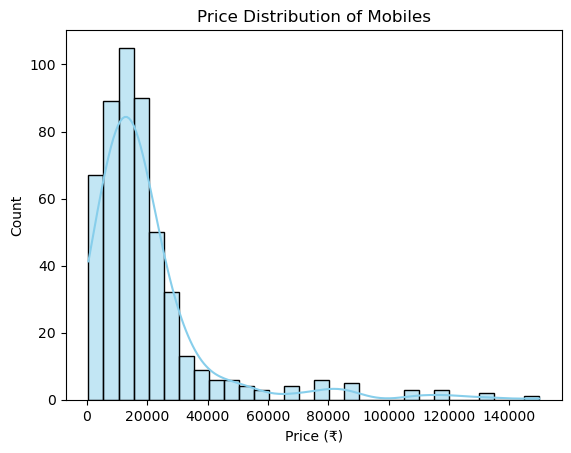

In [53]:
# Univariate
# histplot
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title("Price Distribution of Mobiles") 
plt.xlabel("Price (₹)") 
plt.ylabel("Count") 
plt.show()

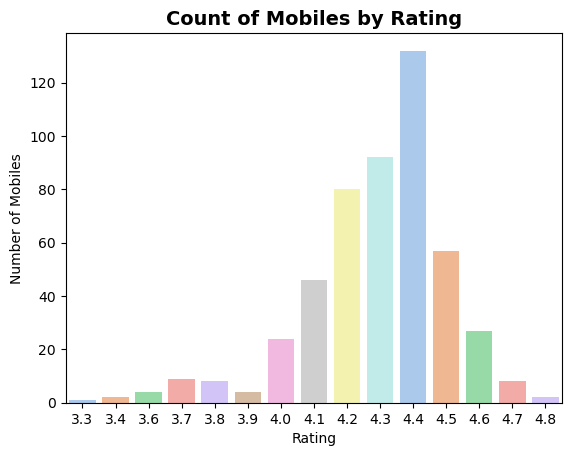

In [54]:
# Univariate
sns.countplot(x='Rating', data=df, palette='pastel')

plt.title("Count of Mobiles by Rating", fontsize=14, fontweight='bold')
plt.xlabel("Rating")
plt.ylabel("Number of Mobiles")
plt.show()

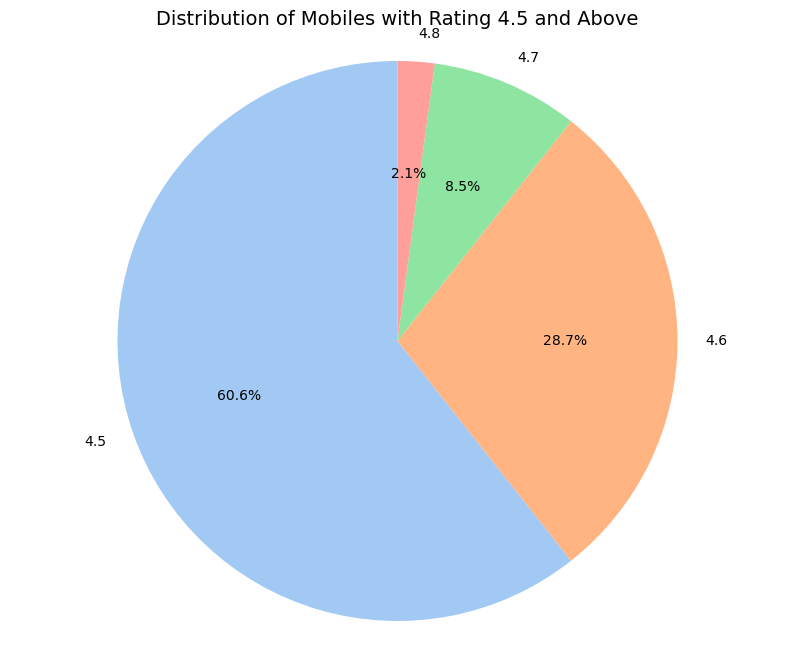

In [55]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df_filtered = df[df['Rating'] >= 4.5]

df_filtered = df_filtered.dropna(subset=['Rating'])
rating_count = df_filtered['Rating'].value_counts().sort_index()

plt.figure(figsize=(10, 8))
plt.pie(
    rating_count,
    labels=[f'{r}' for r in rating_count.index],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel', len(rating_count))
)

plt.title("Distribution of Mobiles with Rating 4.5 and Above", fontsize=14)
plt.axis('equal')  # make chart circular
plt.show()

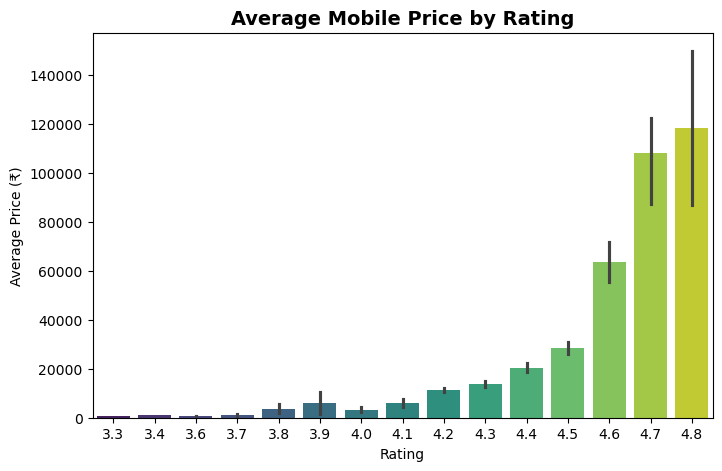

In [56]:
# Bivariate
plt.figure(figsize=(8, 5))
sns.barplot(x='Rating', y='Price', data=df, palette='viridis')

plt.title("Average Mobile Price by Rating", fontsize=14, fontweight='bold')
plt.xlabel("Rating")
plt.ylabel("Average Price (₹)")
plt.show()

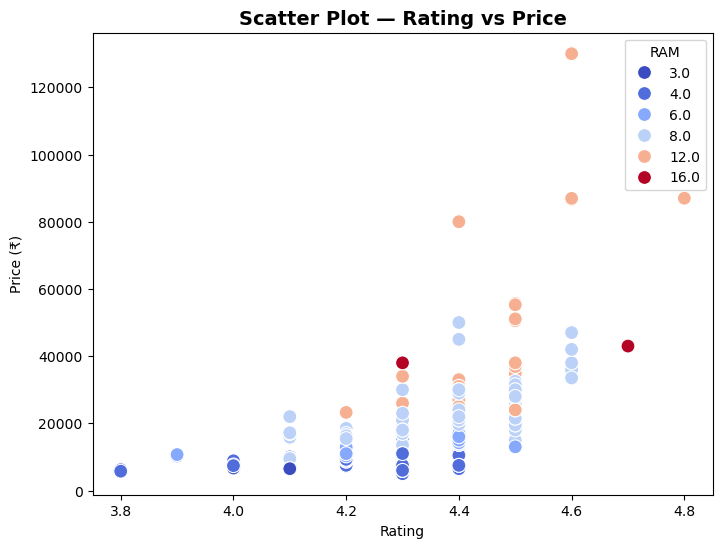

In [57]:
# Bivariate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Price', data=df, hue='RAM', palette='coolwarm', s=100)

plt.title("Scatter Plot — Rating vs Price", fontsize=14, fontweight='bold')
plt.xlabel("Rating")
plt.ylabel("Price (₹)")
plt.legend(title="RAM")
plt.show()


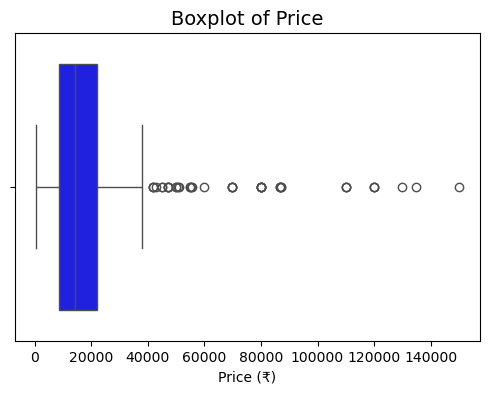

In [58]:
# Bivariate
# boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Price'], color='blue')
plt.title("Boxplot of Price", fontsize=14)
plt.xlabel("Price (₹)")
plt.show()

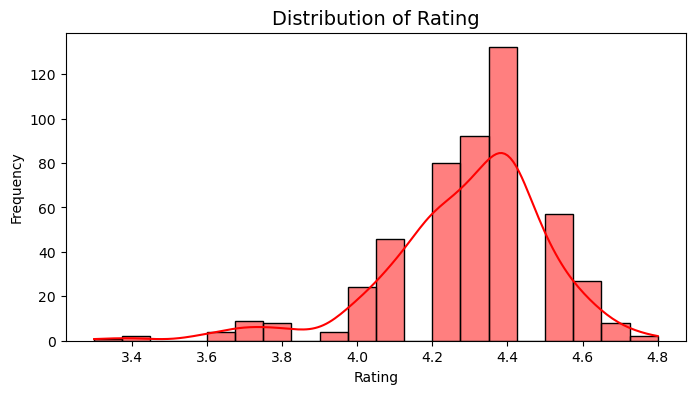

In [59]:
# Univariate
# Distribution of Rating Using Histplot
plt.figure(figsize=(8, 4))
sns.histplot(df['Rating'], kde=True, bins=20, color='red')
plt.title("Distribution of Rating", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

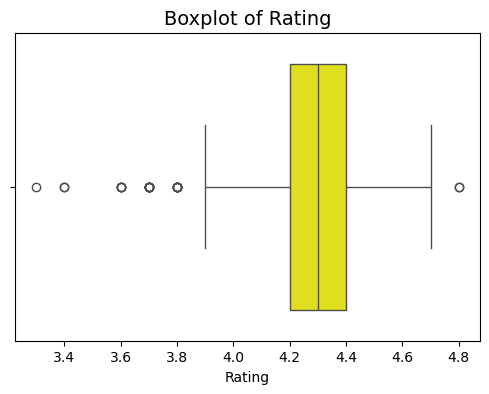

In [60]:
# Distribution of Rating Using Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Rating'], color='yellow')
plt.title("Boxplot of Rating", fontsize=14)
plt.xlabel("Rating")
plt.show()

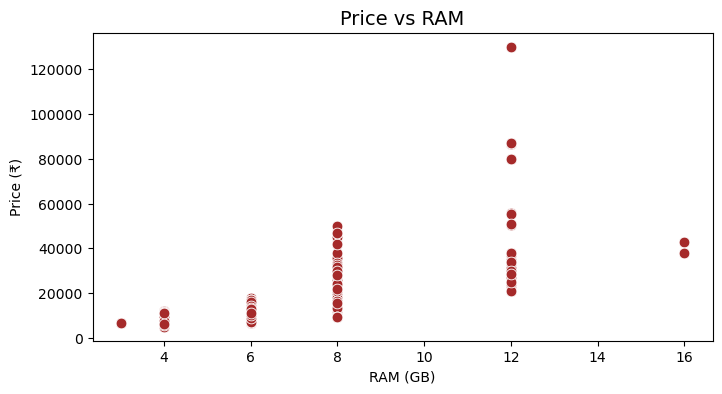

In [61]:
# Bivariate
# Scatterplot 
plt.figure(figsize=(8, 4))
sns.scatterplot(x='RAM', y='Price', data=df, color='brown', s=60)
plt.title("Price vs RAM", fontsize=14)
plt.xlabel("RAM (GB)")
plt.ylabel("Price (₹)")
plt.show()

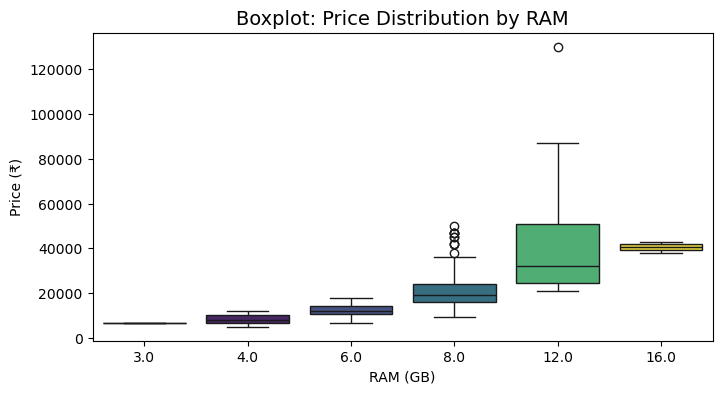

In [62]:
# Bivariate
plt.figure(figsize=(8, 4))
sns.boxplot(x='RAM', y='Price', hue='RAM', data=df, palette='viridis', legend=False)
plt.title("Boxplot: Price Distribution by RAM", fontsize=14)
plt.xlabel("RAM (GB)")
plt.ylabel("Price (₹)")
plt.show()


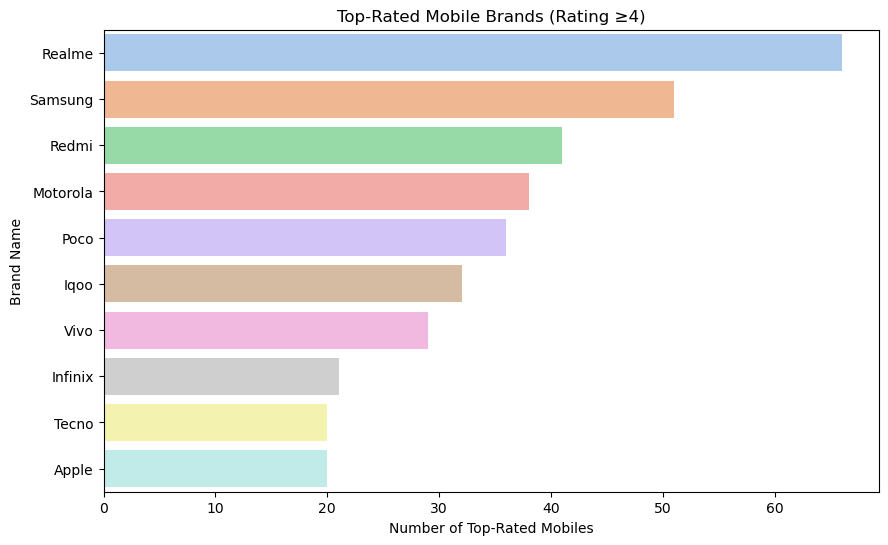

In [63]:
# Bivariate
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df_top = df[df['Rating'] >= 4].dropna(subset=['Rating'])
df_top['Brand'] = df_top['Product Name'].apply(lambda x: re.split(r'\s+', str(x))[0])
top_brands = df_top['Brand'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_brands.values,
    y=top_brands.index,
    palette='pastel'
)
plt.title("Top-Rated Mobile Brands (Rating ≥4)", fontsize=12)
plt.xlabel("Number of Top-Rated Mobiles")
plt.ylabel("Brand Name")
plt.show()

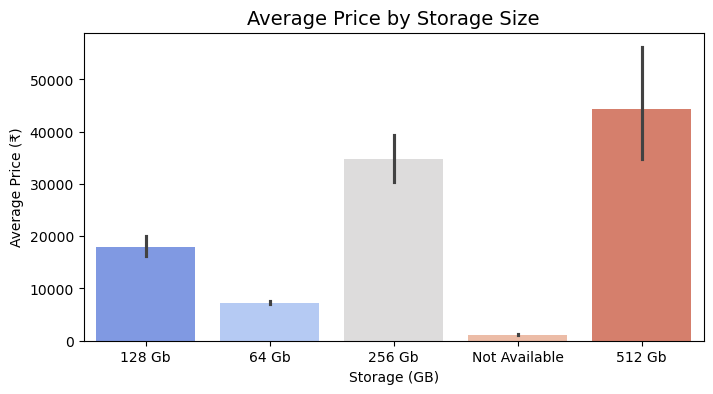

In [64]:
# Bivariate
# Bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Storage', y='Price', hue='Storage',
            data=df, estimator='mean',
            palette='coolwarm', legend=False)
plt.title("Average Price by Storage Size", fontsize=14)
plt.xlabel("Storage (GB)")
plt.ylabel("Average Price (₹)")
plt.show()


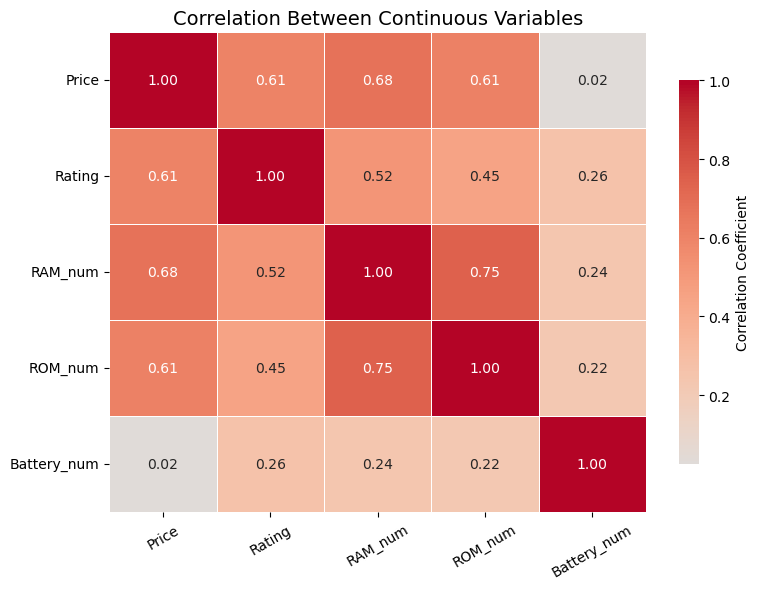

In [65]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

df['RAM_num'] = df['RAM'].astype(str).str.extract(r'(\d+)').astype(float)
df['ROM_num'] = df['ROM'].astype(str).str.extract(r'(\d+)').astype(float)

df['Battery_num'] = df['Battery'].astype(str).str.extract(r'(\d+)').astype(float)

numeric_df = df[['Price', 'Rating', 'RAM_num', 'ROM_num', 'Battery_num']].dropna()

corr = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,        
    fmt=".2f",           
    cmap="coolwarm",     
    center=0,            
    linewidths=0.5,      
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}  # color bar
)

plt.title("Correlation Between Continuous Variables", fontsize=14)
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [66]:
df.describe()

,Price,Rating,RAM,ROM,RAM_num,ROM_num,Battery_num
count,498.000000,496.000000,412.000000,440.000000,412.000000,440.000000,493.000000
mean,19517.604418,4.291734,7.254854,165.047727,7.254854,165.047727,4929.409736
std,20914.264521,0.215726,2.357491,86.450402,2.357491,86.450402,1928.857550
min,480.000000,3.300000,3.000000,4.000000,3.000000,4.000000,1.000000
25%,8714.250000,4.200000,6.000000,128.000000,6.000000,128.000000,5000.000000
50%,14374.000000,4.300000,8.000000,128.000000,8.000000,128.000000,5160.000000
75%,21999.000000,4.400000,8.000000,256.000000,8.000000,256.000000,6000.000000
max,149900.000000,4.800000,16.000000,512.000000,16.000000,512.000000,7550.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 599
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  498 non-null    object 
 1   Price         498 non-null    int64  
 2   Rating        496 non-null    float64
 3   RAM/ROM       498 non-null    object 
 4   Camera        498 non-null    object 
 5   Display       498 non-null    object 
 6   Battery       498 non-null    object 
 7   Warranty      498 non-null    object 
 8   Color         498 non-null    object 
 9   Storage       498 non-null    object 
 10  RAM           412 non-null    float64
 11  ROM           440 non-null    float64
 12  RAM_num       412 non-null    float64
 13  ROM_num       440 non-null    float64
 14  Battery_num   493 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 62.2+ KB
